导入模块

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
wine.data
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

随机森林分类模型

In [3]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [4]:
clf = DecisionTreeClassifier() # random_state=0值固定后只有一组数据
rfc = RandomForestClassifier()

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print(score_c)
print(score_r)

0.9259259259259259
1.0


交叉验证

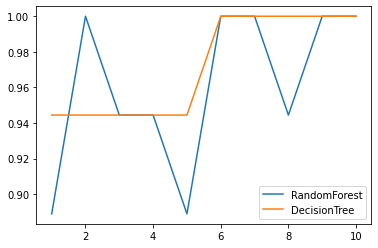

In [5]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25) 
rfc_c = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_c,label='RandomForest')
plt.plot(range(1,11),clf_s,label='DecisionTree')

plt.legend()


RandomForest:
0.9833333333333334
DecisionTree:
0.8705882352941178


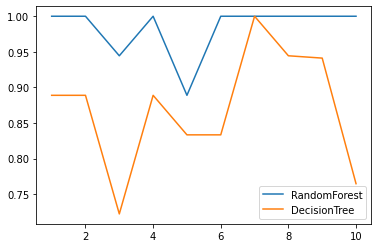

In [6]:
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
   score = cross_val_score(model,wine.data,wine.target,cv=10)
   print("{}:".format(label)),print(score.mean())
   plt.plot(range(1,11),score,label = label)
   plt.legend()
   label = "DecisionTree"

n_estimators的学习曲线

In [ ]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

画出随机森林和决策树在十组交叉验证下的效果对比

[0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779, 0.9777777777777779]
[0.9607843137254901, 0.9666666666666668, 0.9777777777777779, 0.9663398692810456, 0.9441176470588235, 0.9663398692810456, 0.961111111111111, 0.9777777777777779, 0.9666666666666666, 0.9666666666666668]


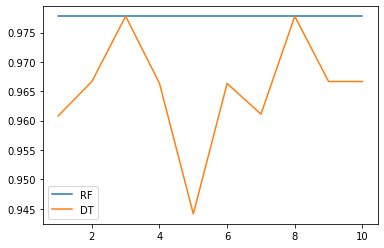

In [14]:
# 进行10次训练+10次交叉验证
rfc_1 = []
clf_1 = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=10) 
    rfc_c = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    clf_1.append(clf_s)

print(rfc_1)
print(clf_1)

plt.plot(range(1,11),rfc_1,label='RF') 
plt.plot(range(1,11),clf_1,label='DT')
plt.legend();

In [26]:
rfc = RandomForestClassifier(n_estimators=25
                            ,random_state=2
                            )
rfc = rfc.fit(Xtrain, Ytrain)

In [27]:
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state


1872583848

In [30]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


bootstrap & oob_score

In [34]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [35]:
#重要属性oob_score_
rfc.oob_score_


0.9775280898876404

重要属性和接口


In [36]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)


1.0

In [37]:
rfc.feature_importances_


array([0.18675666, 0.01443947, 0.01954776, 0.02286117, 0.03086118,
       0.03350971, 0.17597281, 0.0216855 , 0.01084049, 0.16973581,
       0.05187128, 0.14930762, 0.11261053])

In [38]:
rfc.apply(Xtest)


array([[20,  8, 11, ...,  2,  3,  3],
       [ 6,  4,  4, ...,  6, 10,  6],
       [17, 15, 18, ..., 13, 16, 15],
       ...,
       [20,  8, 11, ...,  2,  3,  3],
       [17, 15, 18, ..., 12, 15, 15],
       [ 9, 13, 11, ..., 13,  3,  3]], dtype=int64)

In [39]:
rfc.predict(Xtest)


array([2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 1, 0, 1, 2, 2, 0, 2])

In [40]:
rfc.predict_proba(Xtest)


array([[0.  , 0.  , 1.  ],
       [0.  , 0.92, 0.08],
       [0.92, 0.04, 0.04],
       [0.92, 0.  , 0.08],
       [0.  , 1.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.28, 0.68],
       [0.8 , 0.2 , 0.  ],
       [0.88, 0.12, 0.  ],
       [0.84, 0.08, 0.08],
       [0.  , 0.8 , 0.2 ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.  , 1.  ],
       [0.84, 0.12, 0.04],
       [0.04, 0.92, 0.04],
       [0.12, 0.64, 0.24],
       [0.4 , 0.6 , 0.  ],
       [0.96, 0.  , 0.04],
       [0.2 , 0.8 , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.08, 0.4 , 0.52],
       [0.16, 0.8 , 0.04],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.08, 0.6 , 0.32],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.  , 0.  , 1.  ],
 

In [ ]:
import numpy as np

x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()


In [2]:
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()


0.00036904803455582827

Bonus：Bagging的另一个必要条件

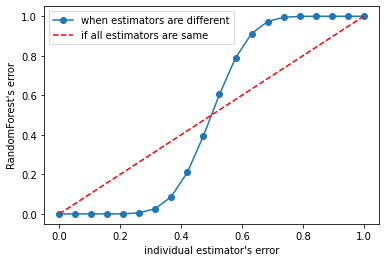

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [ ]:
#class sklearn.tree.DecisionTreeClassifier (criterion=’gini’,
#                                           splitter=’best’, 
#                                           max_depth=None,
#                                           min_samples_split=2, 
#                                           min_samples_leaf=1,
#                                           min_weight_fraction_leaf=0.0, 
#                                           max_features=None,
#                                           random_state=None,
#                                           max_leaf_nodes=None, 
#                                           min_impurity_decrease=0.0, 
#                                           min_impurity_split=None,
#                                           class_weight=None, 
#                                           presort=False)

In [ ]:
#class sklearn.ensemble.RandomForestClassifier (n_estimators=’10’,
#                                               criterion=’gini’, 
#                                               max_depth=None,
#                                               min_samples_split=2, 
#                                               min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0,
#                                               max_features=’auto’,
#                                               max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, 
#                                               min_impurity_split=None, 
#                                               bootstrap=True, 
#                                               oob_score=False,
#                                               n_jobs=None, 
#                                               random_state=None, 
#                                               verbose=0, 
#                                               warm_start=False,
#                                               class_weight=None)

随机森林的回归器

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targe

In [6]:
rfg = RandomForestRegressor(n_estimators=100
                            ,random_state=0        
                            )
cross_val_score(rfg,boston.data,boston.target,cv=10
                ,scoring='neg_mean_squared_error'# 返回负均方误差，不写的话默认返回R2值
                )

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [11]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_